## Dataset: credit_card_balance

This file contains monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows. By comparing this file to the main application file, we see that we can first group by the SK_ID_PREV, the unique ID for the previous loan. Then we will group the resulting dataframe by the SK_ID_CURR to calculate the aggregation statistics for each client across all of their previous loans. Then we merge certain aggregation statistics for each client across all of their previous loans to the training set by unique ID of SK_ID_CURR.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pandas as pd
import os
import numpy as np



## Import dataset

In [2]:
relativePath=os.getcwd()
dataFilePath=relativePath+"/credit_card_balance.csv"
df_credit = pd.read_csv(dataFilePath)

## EDA


************************** credit_card_balance ******************************

Performing basic EDA on credit_card_balance dataset

* The dataset has 3840312 rows and 23 columns.

* First 10 rows of the dataset:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0



* Describing the dataset statistics:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                   

None


* Check data distribution: 


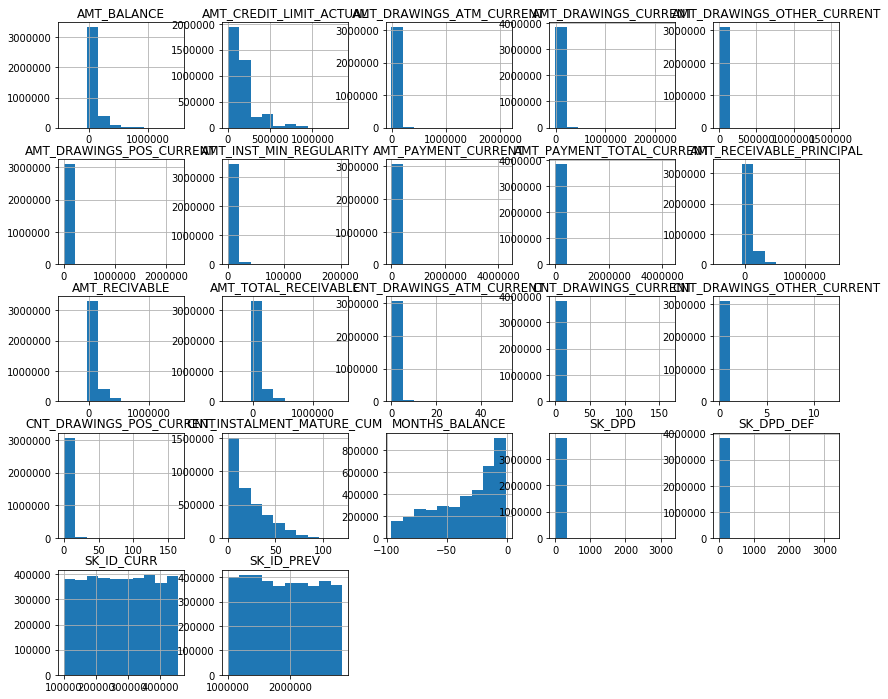

In [3]:
def basic_eda(df, datafile_name="Datafile name"):
    print(f"\n**************************",datafile_name,"******************************\n")
    print(f"Performing basic EDA on {datafile_name} dataset\n")
    print(f"* The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\n* First 10 rows of the dataset:\n")
    display(df_credit.head(10))
    print("\n* Describing the dataset statistics:\n", )
    display(df.describe())
    print("\n* Fetching info of the dataset: \n")
    display(df.info())
    print("\n* Check data distribution: ")
    df.hist(figsize=(14,12))
basic_eda(df_credit, 'credit_card_balance')

### SK_ID_PREV and SK_ID_CURR

In [4]:
print("* All records have distinct SK_ID_CURR? \t", len(df_credit['SK_ID_CURR'].unique()) == df_credit.shape[0])
print("* Total number of unique SK_ID_CURR   : \t", len(df_credit['SK_ID_CURR'].unique()))
print("* All records have distinct SK_ID_PREV? \t", len(df_credit['SK_ID_PREV'].unique()) == df_credit.shape[0])
print("* Total number of unique SK_ID_PREV   : \t", len(df_credit['SK_ID_PREV'].unique()))

* All records have distinct SK_ID_CURR? 	 False
* Total number of unique SK_ID_CURR   : 	 103558
* All records have distinct SK_ID_PREV? 	 False
* Total number of unique SK_ID_PREV   : 	 104307


### SK_DPD and SK_DPD_DEF

In [5]:
print("* Values of SK_DPD\n")
# display(df_credit['SK_DPD'].value_counts())
display(df_credit['SK_DPD'].groupby(pd.cut(df_credit['SK_DPD'],[0,100,200,500,1000,2000,5000])).count())

print("* Values of SK_DPD_DEF\n")
# display(df_credit['SK_DPD_DEF'].value_counts())
display(df_credit['SK_DPD_DEF'].groupby(pd.cut(df_credit['SK_DPD_DEF'],[0,100,200,500,1000,2000,5000])).count())



* Values of SK_DPD



SK_DPD
(0, 100]        106769
(100, 200]        4915
(200, 500]       12673
(500, 1000]      15095
(1000, 2000]     13447
(2000, 5000]       456
Name: SK_DPD, dtype: int64

* Values of SK_DPD_DEF



SK_DPD_DEF
(0, 100]        88307
(100, 200]        113
(200, 500]        172
(500, 1000]       240
(1000, 2000]      354
(2000, 5000]      154
Name: SK_DPD_DEF, dtype: int64

Text(0.5, 1.0, 'Distribution of SK_DPD_DEF')

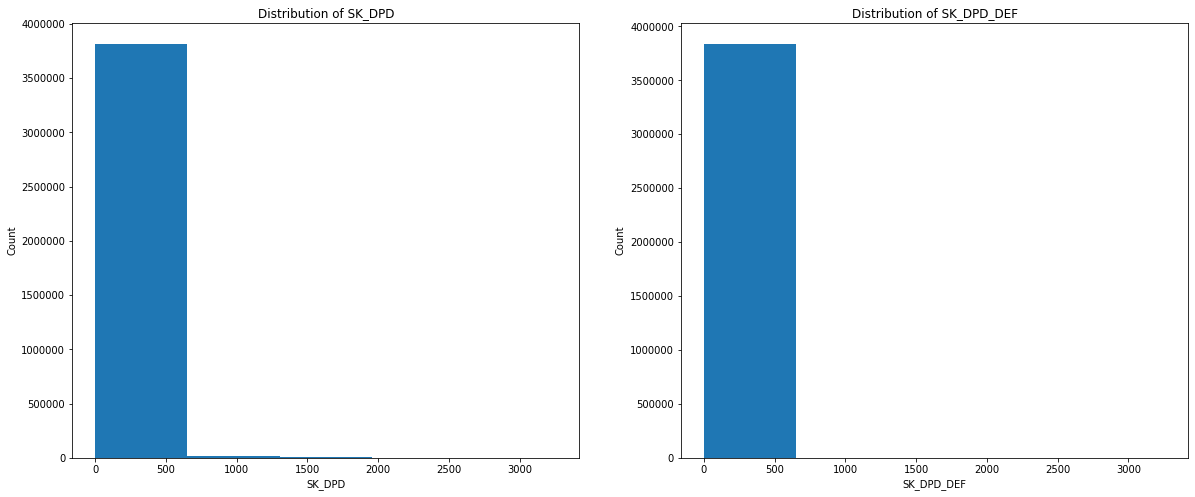

In [6]:
plt.figure(figsize=(20,8))
plt.subplot(121)
_ = plt.hist(df_credit['SK_DPD'], bins=5)
plt.xlabel("SK_DPD")
plt.ylabel("Count")
plt.title("Distribution of SK_DPD")
plt.subplot(122)
_ = plt.hist(df_credit['SK_DPD_DEF'], bins=5)
plt.xlabel("SK_DPD_DEF")
plt.ylabel("Count")
plt.title("Distribution of SK_DPD_DEF")

In [7]:
print(f"* SK_DPD and SK_DPD_DEF are different for {len(df_credit[df_credit.SK_DPD != df_credit.SK_DPD_DEF])} records")
# We will use the the SK_PDP for evaluating how many DPD (Days past due) during the month on the previous credit since the amount is larger

* SK_DPD and SK_DPD_DEF are different for 64439 records


### NAME_CONTRACT_STATUS

In [8]:
df_credit['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

Text(0.5, 1.0, 'Distribution of the previous loan statuses')

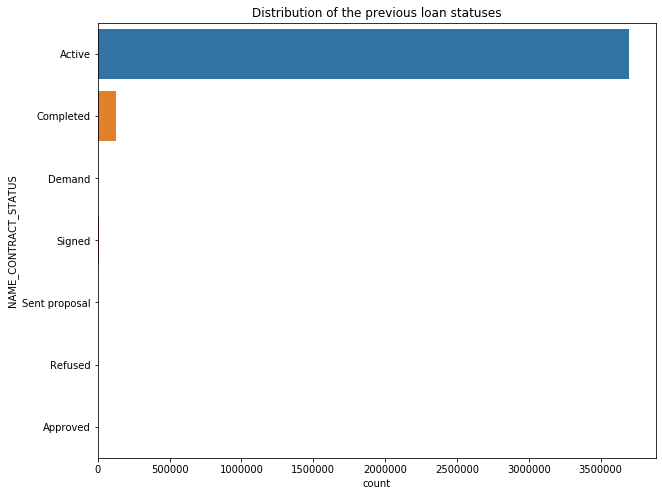

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(y='NAME_CONTRACT_STATUS', data=df_credit)
plt.title("Distribution of the previous loan statuses")

## Feature engineering

### New features planned

- Average Monthly Balance per previous loans
- Average Credit Card Limit per previous loans
- Average Monthly Payments per previous loans
- The percentage of over due payments per previous loans

### Group by 'SK_ID_CURR' and 'SK_ID_PREV'

In [10]:
d = {
    'MONTHS_BALANCE':['sum'],
    'AMT_BALANCE':['mean'],
    'AMT_CREDIT_LIMIT_ACTUAL':['mean'],
    'AMT_PAYMENT_TOTAL_CURRENT':['mean'],
    'SK_DPD':['sum']
    
}
df_credit_agg = df_credit.groupby(['SK_ID_CURR','SK_ID_PREV']).agg(d)


df_credit_agg.columns = df_credit_agg.columns.droplevel()

df_credit_agg.reset_index(inplace=True)

df_credit_agg.columns=['SK_ID_CURR', 'SK_ID_PREV', 'CC_Total_Months_Balance','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments', 'CC_Total_Days_Pass_Due']
display(df_credit_agg.head())

,SK_ID_CURR,SK_ID_PREV,CC_Total_Months_Balance,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,CC_Total_Days_Pass_Due
0,100006,1489396,-21,0.000000,270000.000000,0.000000,0
1,100011,1843384,-2849,54482.111149,164189.189189,4520.067568,0
2,100013,2038692,-4656,18159.919219,131718.750000,6817.172344,1
3,100021,2594025,-170,0.000000,675000.000000,0.000000,0
4,100023,1499902,-60,0.000000,135000.000000,0.000000,0


### Group by SK_ID_CURR

In [13]:
d2 = {
    'CC_Total_Months_Balance':['sum'],
    'CC_Average_Monthly_Balance':['sum'],
    'CC_Average_Credit_Card_Limit':['mean'],
    'CC_Average_Monthly_Payments':['sum'],
    'CC_Total_Days_Pass_Due': ['sum']
    
}
df_credit_out = df_credit_agg.groupby('SK_ID_CURR').agg(d2)

# display(df_out.head())

df_credit_out.columns = df_credit_out.columns.droplevel()

df_credit_out.reset_index(inplace=True)

df_credit_out.columns=['SK_ID_CURR','CC_Total_Months_Balance','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments', 'CC_Total_Days_Pass_Due']
display(df_credit_out.head())

,SK_ID_CURR,CC_Total_Months_Balance,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,CC_Total_Days_Pass_Due
0,100006,-21,0.000000,270000.000000,0.000000,0
1,100011,-2849,54482.111149,164189.189189,4520.067568,0
2,100013,-4656,18159.919219,131718.750000,6817.172344,1
3,100021,-170,0.000000,675000.000000,0.000000,0
4,100023,-60,0.000000,135000.000000,0.000000,0


In [14]:
df_credit_out['Payment_Pass_Due_Perc'] = -df_credit_out['CC_Total_Days_Pass_Due']/df_credit_out['CC_Total_Months_Balance']*30
df_credit_out.head()

,SK_ID_CURR,CC_Total_Months_Balance,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,CC_Total_Days_Pass_Due,Payment_Pass_Due_Perc
0,100006,-21,0.000000,270000.000000,0.000000,0,0.000000
1,100011,-2849,54482.111149,164189.189189,4520.067568,0,0.000000
2,100013,-4656,18159.919219,131718.750000,6817.172344,1,0.006443
3,100021,-170,0.000000,675000.000000,0.000000,0,0.000000
4,100023,-60,0.000000,135000.000000,0.000000,0,0.000000


In [16]:
df_credit_final=df_credit_out.drop(columns=['CC_Total_Months_Balance', 'CC_Total_Days_Pass_Due'])
df_credit_final.head()

,SK_ID_CURR,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,Payment_Pass_Due_Perc
0,100006,0.000000,270000.000000,0.000000,0.000000
1,100011,54482.111149,164189.189189,4520.067568,0.000000
2,100013,18159.919219,131718.750000,6817.172344,0.006443
3,100021,0.000000,675000.000000,0.000000,0.000000
4,100023,0.000000,135000.000000,0.000000,0.000000


## End of notebook

<font color='blue' size=3>===================== End of NoteBook ===========================</font>